In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import seaborn as sns
from datasets import load_dataset

c:\Users\crist\miniconda3\envs\training\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load data
datasets = load_dataset('lukebarousse/data_jobs')
df = datasets['train'].to_pandas()

# clean data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda val: ast.literal_eval(val) if pd.notna(val) else val)


In [3]:
# filter data for job in indonesia
df_ID = df[df['job_country']=='Indonesia'].copy()
df_ID

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
643,Data Scientist,Data Scientist,"Bali, Indonesia",via HR Software For Growing Businesses | Fresh...,Full-time,False,Indonesia,2023-07-03 13:14:47,False,False,Indonesia,None,NaN,NaN,Tyrads PTE. LTD.,"[python, r, aws, gcp, azure, spark, hadoop, ta...","{'analyst_tools': ['tableau', 'power bi'], 'cl..."
1213,Data Scientist,Data Scientist,Indonesia,via Linkedin,Full-time,False,Indonesia,2023-04-17 13:19:59,False,False,Indonesia,None,NaN,NaN,Robert Walters,"[python, sql]","{'programming': ['python', 'sql']}"
1244,Data Engineer,Data Engineer,"Jakarta, Indonesia",via LinkedIn,Full-time,False,Indonesia,2023-08-31 13:44:04,True,False,Indonesia,None,NaN,NaN,JULO,"[sql, java, python, postgresql, redshift, aws,...","{'cloud': ['redshift', 'aws', 'gcp', 'azure'],..."
1858,Data Engineer,Data Engineer - ETL Developer,"Jakarta, Indonesia",via LinkedIn,Contractor,False,Indonesia,2023-05-29 13:14:42,False,False,Indonesia,None,NaN,NaN,PT. IDStar Cipta Teknologi (IDstar),"[sql, oracle, spark, kafka]","{'cloud': ['oracle'], 'libraries': ['spark', '..."
2048,Senior Data Scientist,Senior Data Scientist,Indonesia,via LinkedIn,Full-time,False,Indonesia,2023-05-25 13:32:17,False,False,Indonesia,None,NaN,NaN,Robert Walters,"[sql, python]","{'programming': ['sql', 'python']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785194,Data Analyst,Data Analyst,Indonesia,via Lokersby.id,Full-time,False,Indonesia,2023-07-22 06:46:40,False,False,Indonesia,None,NaN,NaN,PT Istana Mobil Surabaya Indah,None,None
785201,Data Scientist,Data Scientist,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-16 06:25:17,False,False,Indonesia,None,NaN,NaN,Great Giant Foods (GGF),"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
785271,Data Analyst,Data Analyst,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-25 06:23:43,True,False,Indonesia,None,NaN,NaN,Everwhite Indonesia,None,None
785312,Machine Learning Engineer,Machine Learning Engineer,"Jakarta, Indonesia",via Trabajo.org,Full-time,False,Indonesia,2023-11-25 06:23:43,False,False,Indonesia,None,NaN,NaN,Aliz,"[python, sql, gcp, bigquery, airflow, pandas, ...","{'cloud': ['gcp', 'bigquery'], 'libraries': ['..."


In [4]:
df_skills = df_ID.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
643,Data Scientist,python
643,Data Scientist,r
643,Data Scientist,aws
643,Data Scientist,gcp
643,Data Scientist,azure
...,...,...
785312,Machine Learning Engineer,scikit-learn
785312,Machine Learning Engineer,tensorflow
785312,Machine Learning Engineer,pytorch
785567,Data Analyst Intern,r


In [5]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size().reset_index(name='skill_count')
df_skills_count = df_skills_count.sort_values(by='skill_count', ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
718,sql,Data Engineer,596
555,python,Data Engineer,455
556,python,Data Scientist,342
719,sql,Data Scientist,319
689,spark,Data Engineer,235
...,...,...,...
822,vue.js,Machine Learning Engineer,1
841,yarn,Software Engineer,1
842,zoom,Data Analyst,1
7,airflow,Senior Data Scientist,1


In [7]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

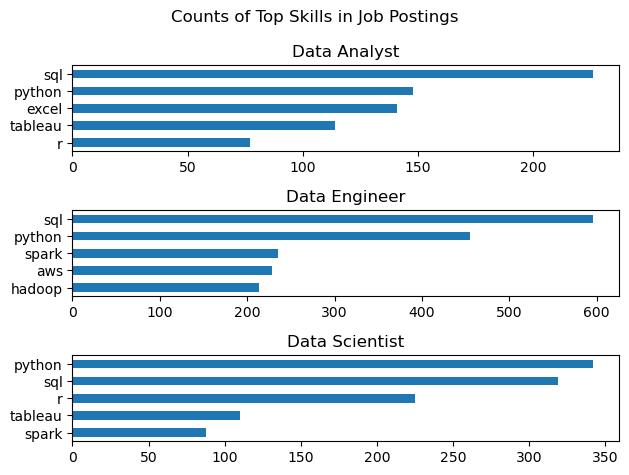

In [8]:
fig, ax = plt.subplots(len(job_titles), 1)

for idx, title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[idx], title=title)
    ax[idx].invert_yaxis()
    ax[idx].set_ylabel('')
    ax[idx].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings')
fig.tight_layout()
plt.show()

In [11]:
df_job_title_count = df_ID['job_title_short'].value_counts().reset_index(name='jobs_total')
df_job_title_count

,job_title_short,jobs_total
0,Data Engineer,1040
1,Data Scientist,645
2,Data Analyst,461
3,Software Engineer,288
4,Senior Data Engineer,117
5,Business Analyst,115
6,Senior Data Scientist,109
7,Cloud Engineer,101
8,Machine Learning Engineer,67
9,Senior Data Analyst,50


In [15]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short' )

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,596,1040,57.307692
1,python,Data Engineer,455,1040,43.750000
2,python,Data Scientist,342,645,53.023256
3,sql,Data Scientist,319,645,49.457364
4,spark,Data Engineer,235,1040,22.596154
...,...,...,...,...,...
840,vue.js,Machine Learning Engineer,1,67,1.492537
841,yarn,Software Engineer,1,288,0.347222
842,zoom,Data Analyst,1,461,0.216920
843,airflow,Senior Data Scientist,1,109,0.917431


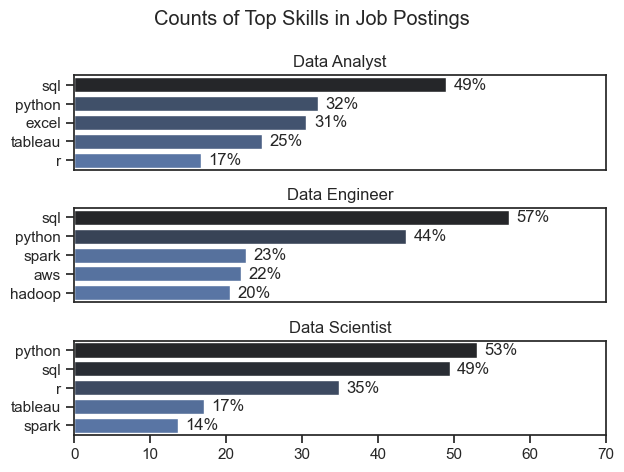

In [28]:
fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for idx, title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == title].head(5)
    sns.barplot(data=df_plot, y='job_skills', x='skill_percent', ax=ax[idx], hue='skill_count', palette='dark:b_r')
    ax[idx].set_ylabel('')
    ax[idx].set_xlabel('')
    ax[idx].legend().set_visible(False)
    ax[idx].set_title(title)
    ax[idx].set_xlim(0,70)

    for i, v in enumerate(df_plot['skill_percent']):
        ax[idx].text(v + 1, i, f'{v:.0f}%', va='center')
    
    if idx != len(job_titles) - 1:
        ax[idx].set_xticks([])

fig.suptitle('Counts of Top Skills in Job Postings')
fig.tight_layout()
plt.show()